In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf
from scipy.stats import norm
from scipy.stats import cauchy 

[*********************100%***********************]  1 of 1 completed


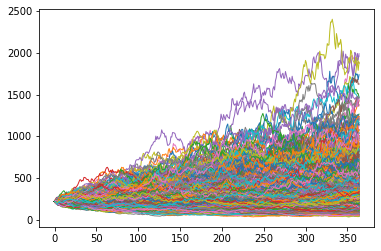

In [167]:
def getData(stock, start = "2010-01-01"):
    data = yf.download(stock, start)
    return data["Close"]


def computeReturns(data, iterations, days):
    log_return = np.log(1 + data.pct_change())
    mu = log_return.mean()
    var = log_return.var()
    drift = mu - (0.5 * var)

    std_dev = log_return.std()

    result = np.exp(drift + std_dev * norm.rvs(size = (days, iterations)))
    prices = np.zeros_like(result)
    prices[0] = data.iloc[-1]
    for i in range(1, days):
        prices[i] = prices[i - 1] * result[i]
    
    for i in range(prices.shape[1]):  
        plt.plot(prices[:, i], lw=1)


computeReturns(getData("TSLA"), 1000, 365)







